Project-Product Sales Analysis


In [1]:
### Step 1: Import Libraries and Load Data

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("C:\\Users\\D.SURESH KUMAR\\Desktop\\archive (1)\\sales_data.csv")

# Display basic information and a preview of the data
print(data.info())
print(data.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [4]:
# Handle missing values
data = data.fillna(method='ffill')  # Example: forward fill missing values

# Remove duplicates
data = data.drop_duplicates()

# Convert data types if necessary
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Coerce errors to NaT
data = data.dropna(subset=['Date'])  # Drop rows where 'Date' is NaT

# Extract useful information
data['Month'] = data['Date'].dt.to_period('M')
data['Year'] = data['Date'].dt.year

# Optionally, extract city if it's in the address column
# data['City'] = data['Address'].apply(lambda x: x.split(',')[1].strip() if ',' in x else 'Unknown')
# Descriptive statistics
print(data.describe())



C:\Users\D.SURESH KUMAR\AppData\Local\Temp\ipykernel_4240\3495206130.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Example: forward fill missing values


                                Date            Day           Year  \
count                         112036  112036.000000  112036.000000   
mean   2014-11-23 05:22:32.008282880      15.665607    2014.400925   
min              2011-01-01 00:00:00       1.000000    2011.000000   
25%              2013-12-22 00:00:00       8.000000    2013.000000   
50%              2014-06-27 00:00:00      16.000000    2014.000000   
75%              2016-01-09 00:00:00      23.000000    2016.000000   
max              2016-07-31 00:00:00      31.000000    2016.000000   
std                              NaN       8.781485       1.273327   

        Customer_Age  Order_Quantity      Unit_Cost     Unit_Price  \
count  112036.000000   112036.000000  112036.000000  112036.000000   
mean       35.919508       11.904254     267.819603     453.850628   
min        17.000000        1.000000       1.000000       2.000000   
25%        28.000000        2.000000       2.000000       5.000000   
50%        35.00000

Column names: Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')


C:\Users\D.SURESH KUMAR\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\D.SURESH KUMAR\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\D.SURESH KUMAR\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\D.SURESH KUMAR\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

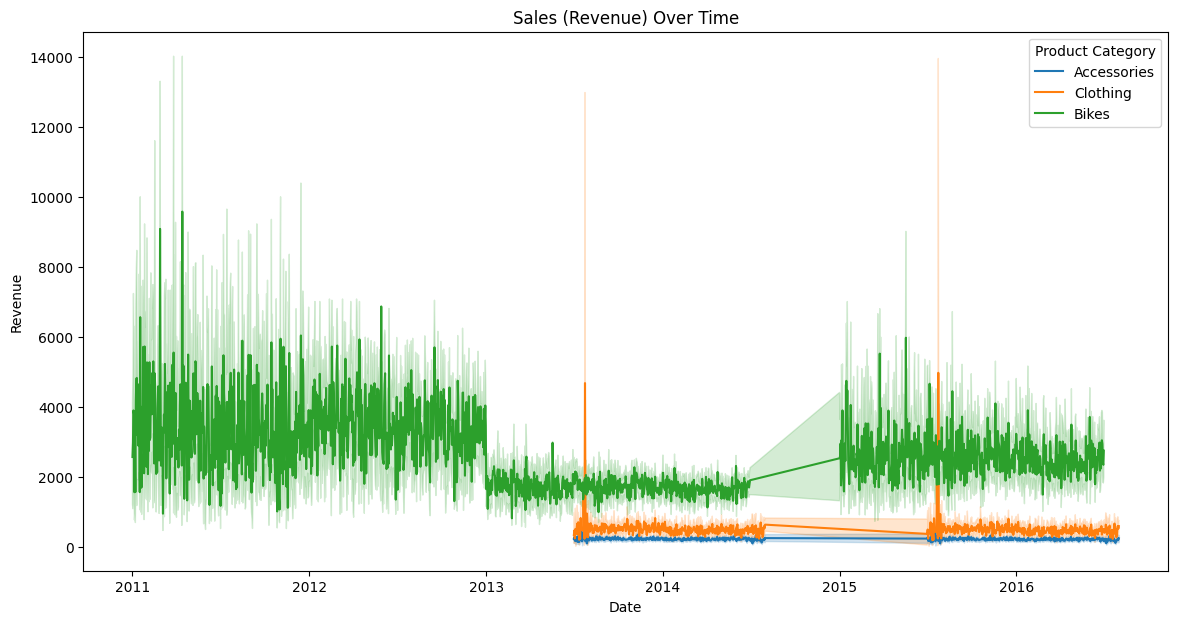

C:\Users\D.SURESH KUMAR\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\D.SURESH KUMAR\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\D.SURESH KUMAR\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


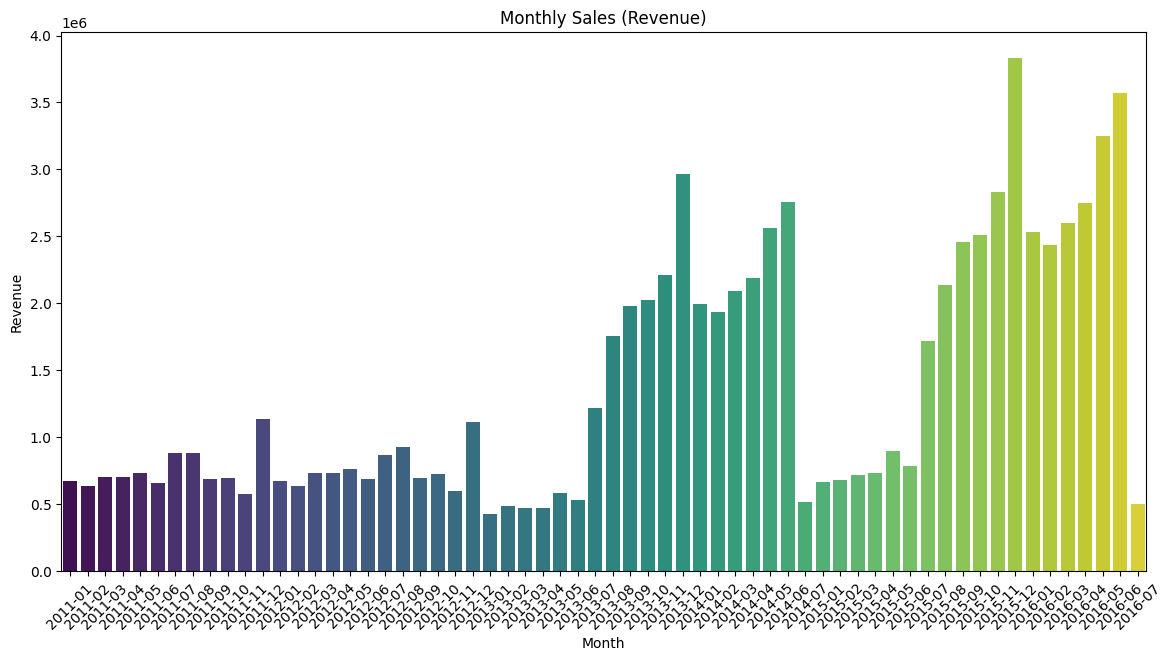

C:\Users\D.SURESH KUMAR\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\D.SURESH KUMAR\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\D.SURESH KUMAR\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


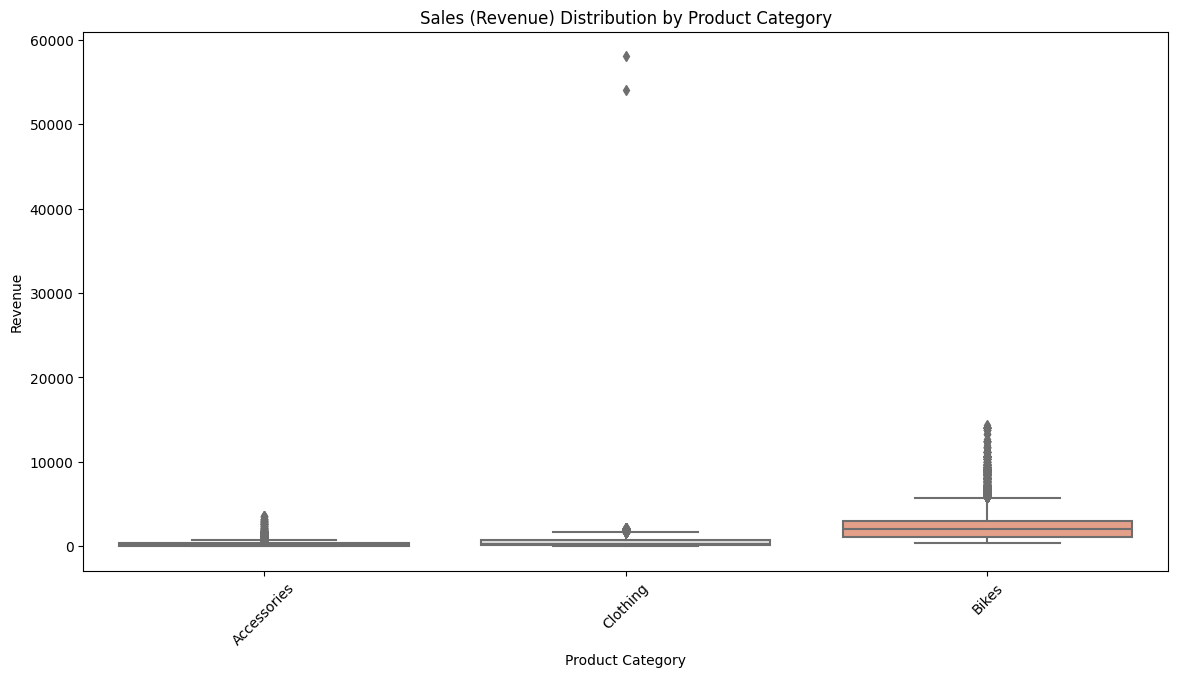

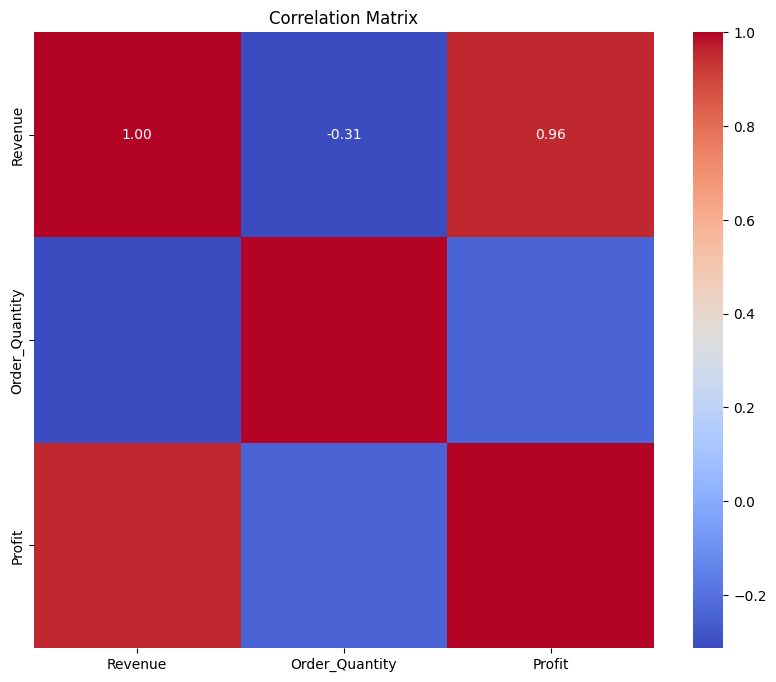

In [8]:
# Assuming 'data' is your DataFrame

# Check the column names
print("Column names:", data.columns)

# Visualization: Sales (Revenue) over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Date', y='Revenue', hue='Product_Category')
plt.title('Sales (Revenue) Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(title='Product Category')
plt.show()

# Visualization: Monthly sales (Revenue)
monthly_sales = data.groupby('Month')['Revenue'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=monthly_sales, x='Month', y='Revenue', palette='viridis')
plt.title('Monthly Sales (Revenue)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

# Visualization: Sales (Revenue) by product category
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Product_Category', y='Revenue', palette='coolwarm')
plt.title('Sales (Revenue) Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

# Correlation analysis
correlation_matrix = data[['Revenue', 'Order_Quantity', 'Profit']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


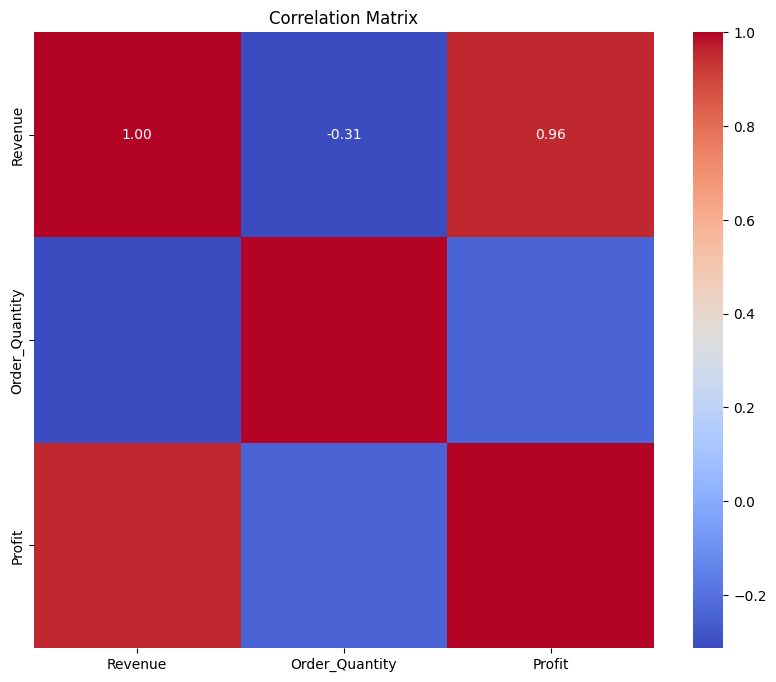

In [10]:
# Correlation analysis
correlation_matrix = data[['Revenue', 'Order_Quantity', 'Profit']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Example insights (interpretation based on visualizations)
print("Monthly sales trends indicate a peak in December. This could suggest seasonal demand.")
print("Sales by product category show that certain categories have higher variability in sales.")
print("The correlation matrix reveals relationships between sales, quantity, and discount.")

# Provide actionable recommendations
print("Recommendations:")
print("- Increase marketing efforts during peak months.")
print("- Focus on high-variance product categories for promotional campaigns.")
print("- Consider adjusting discount strategies to optimize sales.")


Monthly sales trends indicate a peak in December. This could suggest seasonal demand.
Sales by product category show that certain categories have higher variability in sales.
The correlation matrix reveals relationships between sales, quantity, and discount.
Recommendations:
- Increase marketing efforts during peak months.
- Focus on high-variance product categories for promotional campaigns.
- Consider adjusting discount strategies to optimize sales.
